## Intro to DL & OOD

### Resources
- LeCun, Y., Bengio, Y. and Hinton, G., 2015. [Deep Learning](https://www.nature.com/articles/nature14539). nature, 521(7553), pp.436-444.
- [Ignite documentation](https://pytorch-ignite.ai/)
- [PyTorch tutorials](https://pytorch.org/tutorials/) 
- [torchmetrics examples](https://torchmetrics.readthedocs.io/en/stable/pages/quickstart.html)
- [pyOODs](https://pyodds.com/implementedalgos.html)

![pytorch cheatsheet](./figs/pytorch-cheat.jpeg "pytorch cheatsheet")

Figure from [pytorch forum](https://discuss.pytorch.org/t/pytorch-cheat-sheet/72016)

#### We need to organize our files to be easy to use by data loader classes

In [ ]:
import pandas as pd
import numpy as np

groundtruth = pd.read_csv("../data/ISIC2019/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
oodist = list(groundtruth.index[groundtruth.MEL == 1])
indist = list(groundtruth.index[groundtruth.NV == 1])

In [ ]:
from pathlib import Path
import shutil

# get the path/directory
folder_dir = "../data/ISIC2019/ISIC_2019_Training_Input/"

dest_ind_dir = "../data/isic_torch/train/0"
#dest_outd_dir = "../data/isic_torch/test/1"
images = Path(folder_dir).glob("*.jpg")

count = 0
for i in images:
    if i.stem in indist and count < 1000:
        shutil.copy(i, dest_ind_dir)
        count+=1
    elif i.stem in oodist:
        #shutil.copy(i, dest_outd_dir)
        pass

#### How to create a simple autoencoder?

![AE](./figs/ae.png "pytorch cheatsheet")

Figure from [towards data science](https://towardsdatascience.com/anomaly-detection-using-autoencoders-5b032178a1ea)

In [1]:
import torch
from models.ae import Autoencoder
from torchsummary import summary

ae = Autoencoder()

if torch.cuda.is_available():
    ae = ae.cuda()
summary(ae, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 16, 16]             588
              ReLU-2           [-1, 12, 16, 16]               0
            Conv2d-3             [-1, 24, 8, 8]           4,632
              ReLU-4             [-1, 24, 8, 8]               0
            Conv2d-5             [-1, 48, 4, 4]          18,480
              ReLU-6             [-1, 48, 4, 4]               0
   ConvTranspose2d-7             [-1, 24, 8, 8]          18,456
              ReLU-8             [-1, 24, 8, 8]               0
   ConvTranspose2d-9           [-1, 12, 16, 16]           4,620
             ReLU-10           [-1, 12, 16, 16]               0
  ConvTranspose2d-11            [-1, 3, 32, 32]             579
          Sigmoid-12            [-1, 3, 32, 32]               0
Total params: 47,355
Trainable params: 47,355
Non-trainable params: 0
---------------------------------

#### How to make the images ready for our Autoencoder?
- Dataset classes (e.g ImageFolder)
- Dataloader (How to iterate our dataset with DataLoader)
- Transformations (Preprocessing functions and augmentation techniques)

In [2]:
from torchvision import transforms as tfs

transforms_train = [
    tfs.RandomHorizontalFlip(p=0.5),
    #tfs.RandomAutocontrast(p=0.5),
    #tfs.RandomAdjustSharpness(p=0.5, sharpness_factor=0.7),
    tfs.RandomAffine(0, scale=(0.7, 1.0)),
    tfs.Resize((16, 16)),
    # tfs.Grayscale(1),
    tfs.ToTensor(),
    # tfs.Normalize(mean=0.46 ,std=0.32)
]

transforms_test = [
    tfs.Resize((16, 16)),
    # tfs.Grayscale(1),
    tfs.ToTensor(),
    # tfs.Normalize(mean=0.46 ,std=0.32)
]

In [3]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

image_data_train = ImageFolder(
    "../data/isic_torch/train/", transform=tfs.Compose(transforms_train)
)
image_data_test = ImageFolder(
    "../data/isic_torch/test/", transform=tfs.Compose(transforms_test)
)

In [4]:
data_loader_train = DataLoader(image_data_train, batch_size=100, shuffle=True)
data_loader_test = DataLoader(image_data_test, batch_size=100, shuffle=True)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


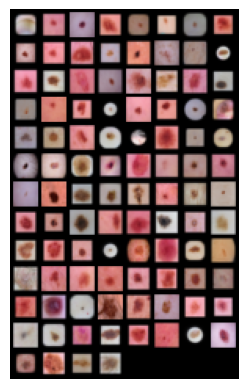

In [5]:
from aux import create_plot_window, imshow
import torchvision

dataiter = iter(data_loader_train)
images, labels = next(dataiter)
print(labels)
imshow(torchvision.utils.make_grid(images))

tensor([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1])


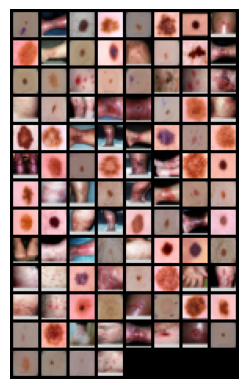

In [6]:
dataiter = iter(data_loader_test)
images, labels = next(dataiter)
print(labels)
imshow(torchvision.utils.make_grid(images))

#### After our data is loaded into PyTorch we will train our model
    - We need to define which criterion to use during trainig.
    - How to optimize our solution space.
    - Define which metrics to we want to follow during training.

In [10]:
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torchmetrics

device = "cpu"

ae = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(ae.parameters(), lr=0.0001, betas=(0.5, 0.999))

if torch.cuda.is_available():
    AE = ae.cuda()
    criterion.cuda()

In [ ]:
from aux import get_torch_vars

epochs = 100

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, _) in enumerate(data_loader_train, 0):
        inputs = get_torch_vars(inputs)

        # Forward Pass
        encoded, outputs = ae(inputs)
        loss = criterion(outputs, inputs)

        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.data
        if i % 50 == 49:  # print every 2000 mini-batches
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

#### After our model is trained we can save the weights
- Use save and load functions
- Use the trained model with our test data
- Extract the reconstruction error and make a threshold

In [ ]:
torch.save(ae.state_dict(), "./weights/autoencoder.pkl")

In [18]:
ae = Autoencoder()
ae.load_state_dict(torch.load("./weights/autoencoder_300.pkl", map_location="cpu"))

<All keys matched successfully>

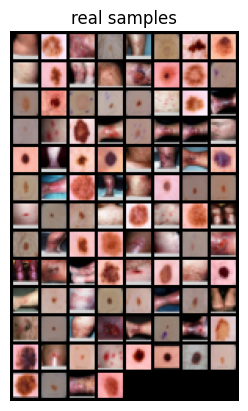

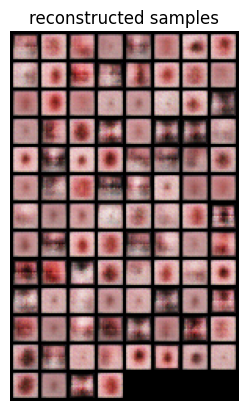

In [19]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

dataiter = iter(data_loader_test)
images, labels = next(dataiter)

plt.title("real samples")
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
labels, decoded_imgs = ae(images)
plt.title("reconstructed samples")
imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [20]:
mse = nn.MSELoss(reduction="sum")
mse_test = list()
labels_test = list()

In [30]:
for i, (inputs, labels) in enumerate(data_loader_test, 0):
    for j in range(inputs.shape[0]):
        # print(inputs.shape)
        images = Variable(inputs)
        decoded_imgs = ae(images)[1]
        mse_test.append(mse(decoded_imgs[j], images[j]).item())
        labels_test.append(labels[j].detach().numpy().item())

In [31]:
assert len(labels_test) == len(mse_test)

In [32]:
len(labels_test)

266

In [33]:
import pandas as pd

error_df = pd.DataFrame({"re": mse_test, "labels": labels_test})

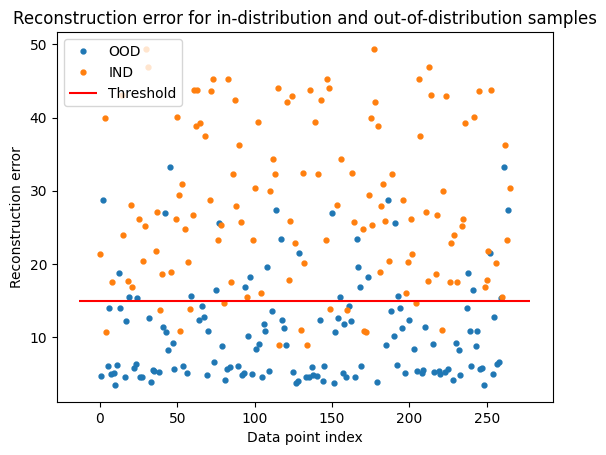

In [34]:
import matplotlib.pyplot as plt
from aux import plot_re

groups = error_df.groupby("labels")
threshold_fixed = 15

plot_re(groups, threshold_fixed)

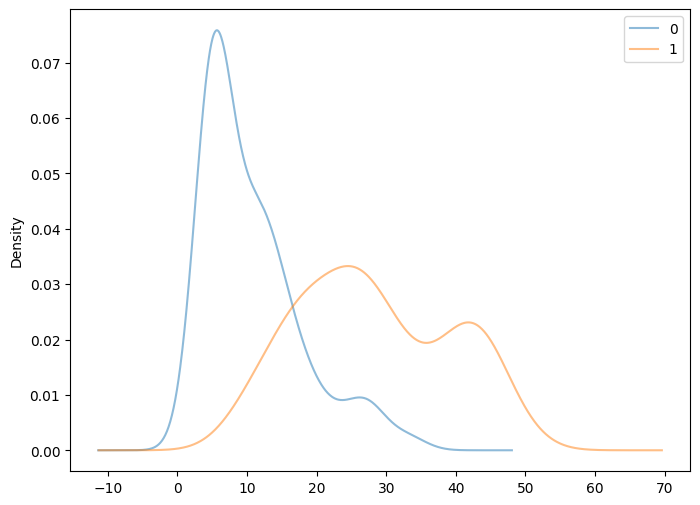

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, df in error_df.groupby("labels"):
    df["re"].plot(kind="kde", ax=ax, label=label, alpha=0.5)
plt.legend()

In [36]:
error_df["output"] = error_df["re"].apply(lambda x: 0 if x <= threshold_fixed else 1)
error_df

,re,labels,output
0,21.377768,1,1
1,4.712723,0,0
2,28.795338,0,1
3,39.873669,1,1
4,10.659214,1,0
...,...,...,...
261,33.191578,0,1
262,36.262661,1,1
263,23.334019,1,1
264,27.329659,0,1


In [37]:
import torchmetrics

aucroc = torchmetrics.AUROC(task="binary")
aucroc(
    torch.tensor(error_df["labels"].values), torch.tensor(error_df["output"].values)
)

tensor(0.8385)

In [38]:
from sklearn.metrics import classification_report

print(
    classification_report(
        error_df["labels"].values,
        error_df["output"].values,
        target_names=["In-distribution", "Out-distribution"],
    )
)

                  precision    recall  f1-score   support

 In-distribution       0.89      0.78      0.83       138
Out-distribution       0.79      0.89      0.84       128

        accuracy                           0.83       266
       macro avg       0.84      0.84      0.83       266
    weighted avg       0.84      0.83      0.83       266



## Malaria Study 

#### TODO by team

- Load and create folder structure needed for pytorch
- Define transformations, create DataLoaders
- Train AE, inspect reconstruction error and other metrics